In [6]:
import numpy as np
import pandas as pd
import keras
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import scale
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from prettytable import PrettyTable
import h5py
import joblib
from sklearn.preprocessing import MinMaxScaler 


In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train[0].shape)
x_train.shape

(28, 28)


(60000, 28, 28)

In [9]:
import os

# Specify the directory to save the data
save_dir = 'mnist_data'
os.makedirs(save_dir, exist_ok=True)

# Save training data as CSV
np.savetxt(os.path.join(save_dir, 'x_train.csv'), x_train.reshape(x_train.shape[0], -1), delimiter=',')
np.savetxt(os.path.join(save_dir, 'y_train.csv'), y_train, delimiter=',')

# Save testing data as CSV
np.savetxt(os.path.join(save_dir, 'x_test.csv'), x_test.reshape(x_test.shape[0], -1), delimiter=',')
np.savetxt(os.path.join(save_dir, 'y_test.csv'), y_test, delimiter=',')

print("MNIST data saved as CSV locally.")


MNIST data saved as CSV locally.


In [3]:
print(x_test[0],'\n',y_test[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 19

In [4]:
df_train = pd.DataFrame(x_train.reshape(x_train.shape[0], -1))
df_test = pd.DataFrame(x_test.reshape(x_test.shape[0], -1))
df_train['label'] = y_train
df_test['label'] = y_test
df = pd.concat([df_train, df_test], ignore_index=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, 0 to label
dtypes: uint8(785)
memory usage: 52.4 MB


In [6]:
df.label.value_counts()

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: label, dtype: int64

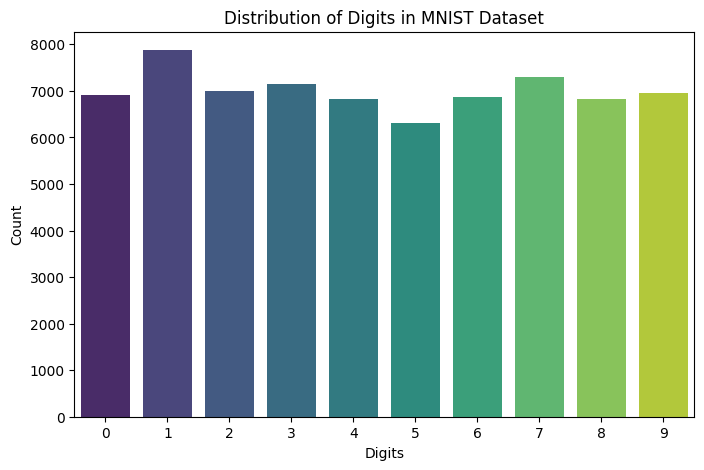

In [7]:
digit_counts = df['label'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
sns.barplot(x=digit_counts.index, y=digit_counts.values, palette='viridis')
plt.xlabel('Digits')
plt.ylabel('Count')
plt.title('Distribution of Digits in MNIST Dataset')
plt.show()

In [8]:
df.isnull().sum()

0        0
1        0
2        0
3        0
4        0
        ..
780      0
781      0
782      0
783      0
label    0
Length: 785, dtype: int64

In [9]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


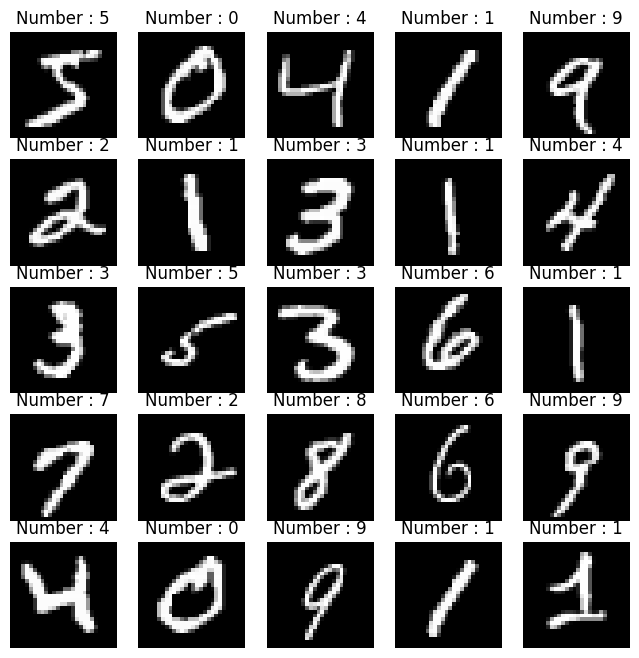

In [10]:
# Just to see what the data looks like
plt.figure(figsize=(8, 8))
for i in range(5 * 5):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Number : {y_train[i]}")
    plt.axis('off')
plt.show()


In [11]:
# x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
# x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

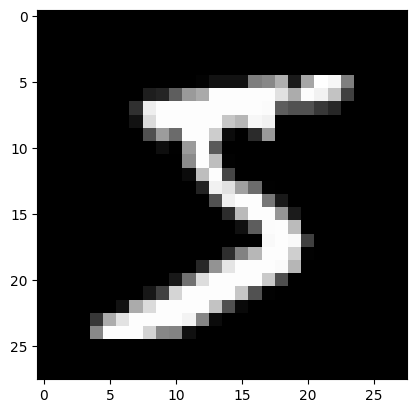

In [12]:
# FIRST IMAGE IN TRAINING SET
plt.imshow(x_train[0].reshape(28, 28), cmap='gray')

In [13]:
print(x_train[0].reshape(28, 28)[5:-5, 5:-5])


[[  0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247]
 [  0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195]
 [  0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39]
 [  0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0]
 [  0   0   0  80 156 107 253 253 205  11   0  43 154   0   0   0   0   0]
 [  0   0   0   0  14   1 154 253  90   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 139 253 190   2   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  11 190 253  70   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  35 241 225 160 108   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  81 240 253 253 119  25   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  45 186 253 253 150  27   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  16  93 252 253 187   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 249 253 249  64   0   0]
 [  0   0   0   0   0   0

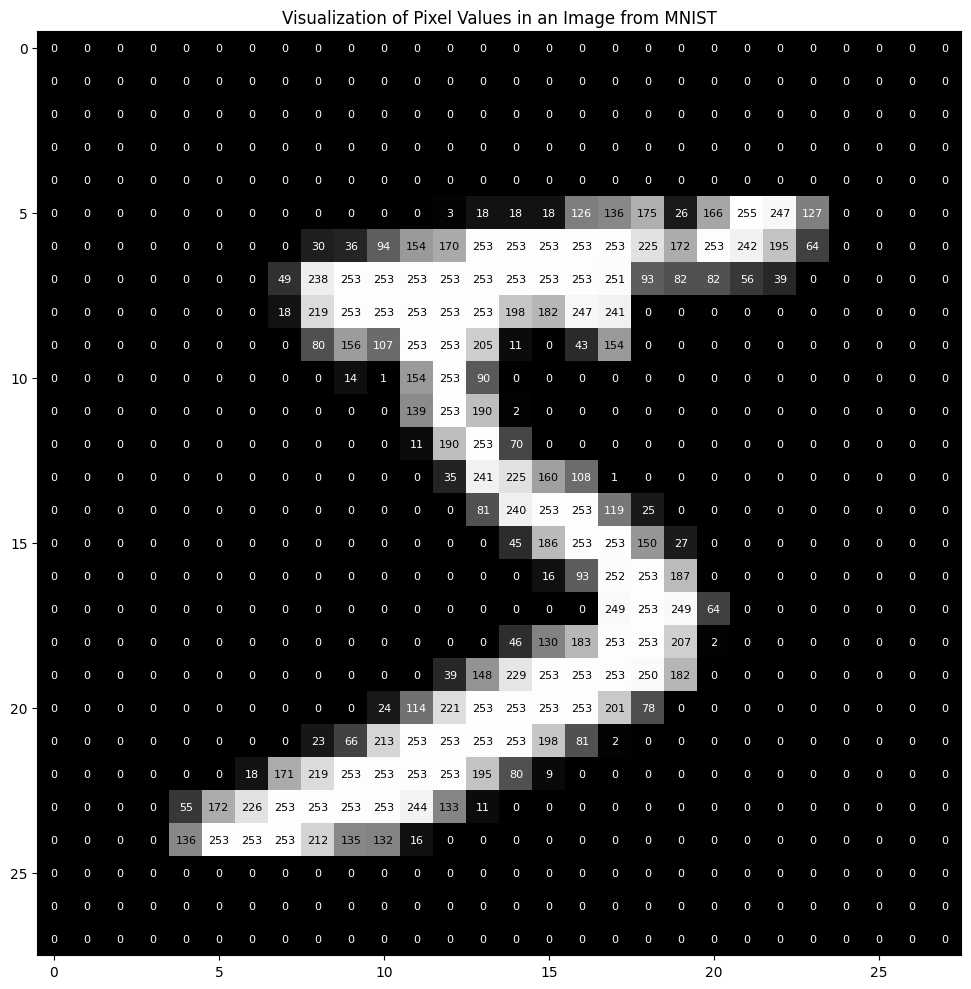

In [14]:
img = x_train[0]  # Assuming x_train is your training data
fig = plt.figure(figsize=(10, 10))  # Increase the figure size
plt.imshow(img, cmap='gray', interpolation='nearest')  # Displaying the image with a grayscale colormap

width, height = img.shape
thresh = img.max() / 2

for x in range(width):
    for y in range(height):
        val = round(img[x][y], 2) if img[x][y] != 0 else 0
        plt.text(y, x, str(val), ha='center', va='center',
                color='white' if img[x][y] < thresh else 'black', fontsize=8)  # Increase fontsize

plt.title('Visualization of Pixel Values in an Image from MNIST')
plt.tight_layout()
plt.show()

<h3>Data Preparation for Modeling</h3>

In [15]:
x = df.drop('label', axis=1)
y = df['label']
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
# x = scaler.fit(x)
# x = scaler.transform(x)
x_train_svm, x_test_svm, y_train_svm, y_test_svm = train_test_split(x, y, train_size=0.10, random_state=101)


In [16]:
print(x_train_svm.shape)
print(x_test_svm.shape)
print(y_train_svm.shape)
print(y_test_svm.shape)

(7000, 784)
(63000, 784)
(7000,)
(63000,)


In [17]:
# del x_test_svm
# del y_test_svm

<h3><b>DATA MODELING</h3>

<h3><u>Traditional Machine Learning Models

- Linear SVM

In [18]:
from sklearn import svm
svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(x_train_svm, y_train_svm)

SVC(kernel='linear')

In [19]:
# take a subset for testing and prediction
x_test_svm = x_test_svm[:10000]
y_test_svm = y_test_svm[:10000]
pred_svm = svm_linear.predict(x_test_svm)
print("ACCURACY USING SVM (linear kernel) is ", metrics.accuracy_score(y_true=y_test_svm, y_pred=pred_svm) * 100, "%")

ACCURACY USING SVM (linear kernel) is  91.79 %


Accuracy for each and every digits there in MNIST dataset

In [20]:
digitwise = metrics.classification_report(y_true=y_test_svm, y_pred=pred_svm)
print(digitwise)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1008
           1       0.94      0.98      0.96      1097
           2       0.91      0.91      0.91       989
           3       0.87      0.89      0.88      1046
           4       0.92      0.93      0.93       960
           5       0.89      0.86      0.87       913
           6       0.94      0.95      0.95      1005
           7       0.93      0.94      0.93      1068
           8       0.92      0.85      0.88       940
           9       0.91      0.89      0.90       974

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [21]:
def plot_confusion_matrix(y_pred, y_true, model_name):
    title = 'Confusion matrix - ' + model_name  
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, linecolor='black')
    plt.title(title) 
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

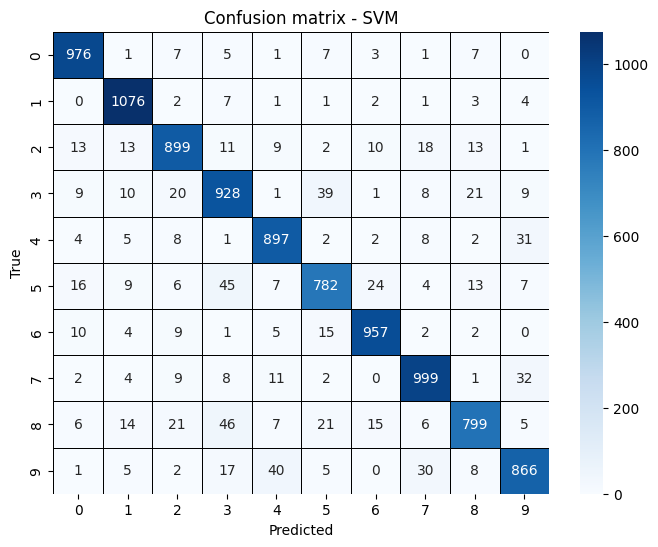

In [22]:
plot_confusion_matrix(pred_svm, y_test_svm, model_name='SVM') 

- Non Linear SVM with rbf kernel

In [23]:
svm_non_linear = svm.SVC(kernel='rbf')
svm_non_linear.fit(x_train_svm, y_train_svm)

SVC()

In [24]:
x_test_rbf = x_test_svm[:10000]
y_test_rbf = y_test_svm[:10000]
pred_rbf = svm_non_linear.predict(x_test_rbf)
print("ACCURACY USING SVM (rbf)", metrics.accuracy_score(y_true = y_test_rbf, y_pred=pred_rbf) * 100, "%")

ACCURACY USING SVM (rbf) 95.39999999999999 %


In [25]:
digitwise1 = metrics.classification_report(y_true=y_test_rbf, y_pred=pred_rbf)
print(digitwise1)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1008
           1       0.97      0.98      0.98      1097
           2       0.95      0.95      0.95       989
           3       0.94      0.94      0.94      1046
           4       0.95      0.96      0.95       960
           5       0.95      0.94      0.95       913
           6       0.96      0.98      0.97      1005
           7       0.95      0.95      0.95      1068
           8       0.96      0.93      0.94       940
           9       0.94      0.93      0.93       974

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



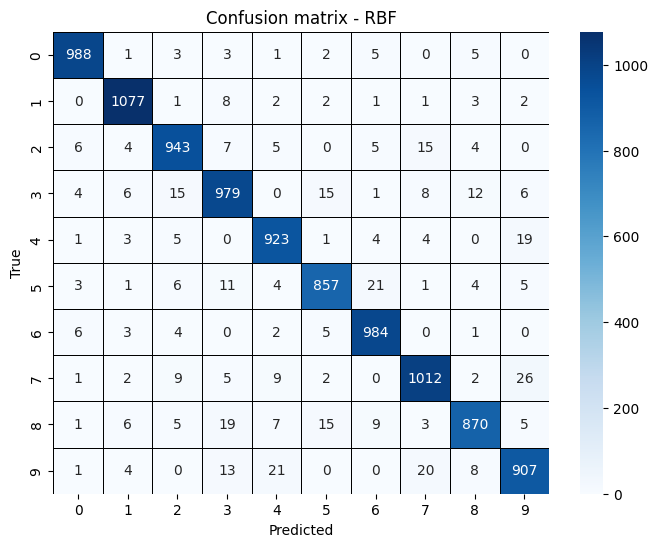

In [26]:
plot_confusion_matrix(pred_rbf, y_test_rbf, model_name='RBF') 

In [27]:
# joblib.dump(svm_linear, 'svm_linear.joblib')
# joblib.dump(svm_non_linear, 'svm_non_linear.joblib')
# with h5py.File('svm_data.h5', 'w') as hf:
#     hf.create_dataset('x_test_svm', data=x_test_svm)
#     hf.create_dataset('y_test_svm', data=y_test_svm)
#     hf.create_dataset('x_test_rbf', data=x_test_rbf)
#     hf.create_dataset('y_test_rbf', data=y_test_rbf)
#     hf.create_dataset('pred_rbf', data=pred_rbf)

Here, we can see that the non-linear SVM with rbf kernel is giving better accuracy than the linear SVM model. Also grid search can be used to further refine the results and choose the best parameters for the model.

<h4>Model Tuning (using Grid Search) :

In [28]:
from sklearn.model_selection import GridSearchCV

parameters = {'C': [5, 10],
              'gamma': [0.0001, 0.001, 0.01]}
# x_train_subset = x_train_svm[:2000]
# y_train_subset = y_train_svm[:2000]

svc_grid = svm.SVC(kernel="rbf")
clf = GridSearchCV(svc_grid, param_grid=parameters, scoring='accuracy', n_jobs=-1, verbose=1)
clf.fit(x_train_svm, y_train_svm)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [5, 10], 'gamma': [0.0001, 0.001, 0.01]},
             scoring='accuracy', verbose=1)

In [29]:
cv_results = pd.DataFrame(clf.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,47.103501,0.884829,13.585104,1.141551,5,0.0001,"{'C': 5, 'gamma': 0.0001}",0.885714,0.874286,0.892143,0.891429,0.902143,0.889143,0.009118,6
1,20.709890,1.022003,8.981641,1.770315,5,0.001,"{'C': 5, 'gamma': 0.001}",0.925000,0.927143,0.926429,0.928571,0.929286,0.927286,0.001525,4
2,20.073358,1.081040,8.779531,1.210578,5,0.01,"{'C': 5, 'gamma': 0.01}",0.957143,0.955000,0.956429,0.959286,0.955000,0.956571,0.001591,1
3,34.436972,3.344968,12.474976,1.166339,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.900714,0.895000,0.913571,0.909286,0.912857,0.906286,0.007262,5
4,15.509873,0.336431,6.532839,0.173589,10,0.001,"{'C': 10, 'gamma': 0.001}",0.925714,0.930714,0.927143,0.937143,0.937143,0.931571,0.004832,3
5,17.518969,0.283728,5.239052,0.483334,10,0.01,"{'C': 10, 'gamma': 0.01}",0.955000,0.952143,0.956429,0.959286,0.956429,0.955857,0.002321,2


In [30]:
best_score = clf.best_score_
best_hyperparams = clf.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9565714285714286 corresponding to hyperparameters {'C': 5, 'gamma': 0.01}


<h3><u>Deep Learning Models

In [31]:
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0 
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

<h4> Simple Neural Network or Fully Connected Neural Network

**Declaring** a Simple NN model : 

In [32]:
model_simple = Sequential() 

Adding **layers** to Simple NN : 

In [33]:
# model_simple.add(input_shape=(28, 28, 1))
model_simple.add(Flatten()) 
model_simple.add(Dense(units=128, activation='relu')) # relu is used for scaling the data between 0 and 1 
                                                        # by adding a non-linearity to the network
model_simple.add(Dense(units=10, activation='softmax')) # 0 to 9 digits
# model_simple.summary()

In [34]:
model_simple.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_simple  = model_simple.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
test_loss_simple, test_acc_simple = model_simple.evaluate(x_test, y_test)
print('Test accuracy:', test_acc_simple)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2569 - accuracy: 0.9266 - val_loss: 0.1409 - val_accuracy: 0.9584
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1127 - accuracy: 0.9664 - val_loss: 0.0979 - val_accuracy: 0.9688
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0783 - accuracy: 0.9765 - val_loss: 0.0905 - val_accuracy: 0.9715
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0576 - accuracy: 0.9829 - val_loss: 0.0835 - val_accuracy: 0.9755
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0751 - accuracy: 0.9767
Test accuracy: 0.9767000079154968


In [35]:
model_simple.summary()
model_simple.save('model_simple.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


313/313 [==============================] - 1s 2ms/step


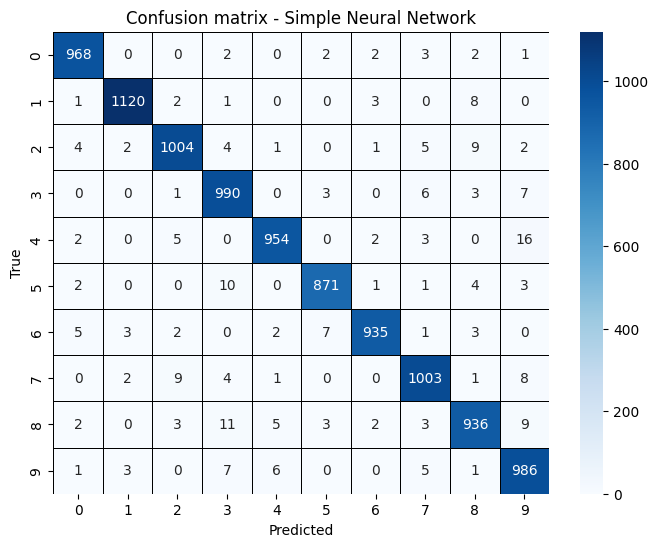

In [36]:
#confusion matrix for simple neural network
pred_simple = model_simple.predict(x_test)
pred_simple_classes = np.argmax(pred_simple, axis=1)
Y_true = np.array(y_test)
plot_confusion_matrix(pred_simple_classes, Y_true, model_name='Simple Neural Network')

<h4> Convolutional Neural Network (CNN)

Input -> Conv2D -> ReLU -> MaxPooling2D -> Flatten -> Dense -> ReLU -> Dense -> Softmax

In [37]:
model_cnn = Sequential()
# model.summary() # this wont work as we have not added any layers yet

Adding **Convolution** layer : 

In [38]:
# added a new convolution layer for feature extraction with a kernel/filter/sliding window of size 3x3
model_cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
# model_cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu')) # 1 is for grayscale image and 3 for rgb

# in NN we generally use .add() to add up a new layer to the model
# model.summary()

In [39]:
# add padding to the image
# does adding padding help in improving the accuracy?
# model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')) 
# model.summary()

Adding **Pooling** and **Flattening** the matrix after convolution + pooling which is then fed to the fully connected layer : 

In [40]:
# model_cnn.add(MaxPooling2D(pool_size=(3, 3)))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Flatten())
# model.summary()

<h5><b>Now the features are flattened and passed to the dense layer for classification </b></h5>
<i>Now understand the architecture of CNN model by looking at the summary of the model i.e. how many layers are there, what is the shape of the output of each layer etc.

In [41]:
model_cnn.add(Dense(units= 128, activation='relu'))

model_cnn.add(Dense(units=10, activation='softmax'))
# model.summary()

In [42]:
from tensorflow.keras.optimizers import Adam

In [43]:
# configuring the model for training and fitting so that it can learn the patterns
model_cnn.compile(optimizer= Adam(learning_rate=0.01), # adaptive moment estimation
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_cnn = model_cnn.fit(x_train, y_train, epochs=5)
test_loss_cnn, test_acc_cnn = model_cnn.evaluate(x_test, y_test)
print('Test accuracy:', test_acc_cnn)

Epoch 1/5
1875/1875 [==============================] - 47s 24ms/step - loss: 0.1837 - accuracy: 0.9447
Epoch 2/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.1120 - accuracy: 0.9674
Epoch 3/5
1875/1875 [==============================] - 48s 25ms/step - loss: 0.0927 - accuracy: 0.9735
Epoch 4/5
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0884 - accuracy: 0.9754
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.0816 - accuracy: 0.9806
Test accuracy: 0.9805999994277954


In [44]:
model_cnn.summary()
# model_cnn.save('model_cnn.h5')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 10816)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               1384576   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                      

313/313 [==============================] - 2s 6ms/step


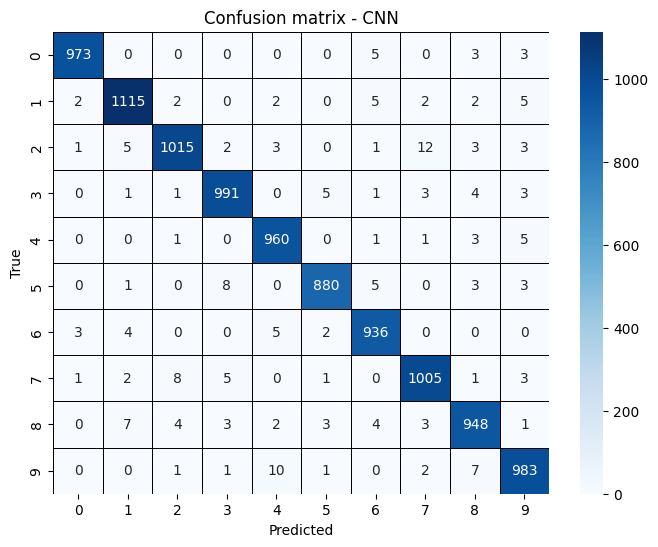

In [45]:
#confusion matrix for CNN
pred_cnn = model_cnn.predict(x_test)
pred_cnn_classes = np.argmax(pred_cnn, axis=1)
# Y_true = np.array(y_test)
# confusion_mtx = confusion_matrix()
plot_confusion_matrix(Y_true, pred_cnn_classes, model_name= 'CNN')

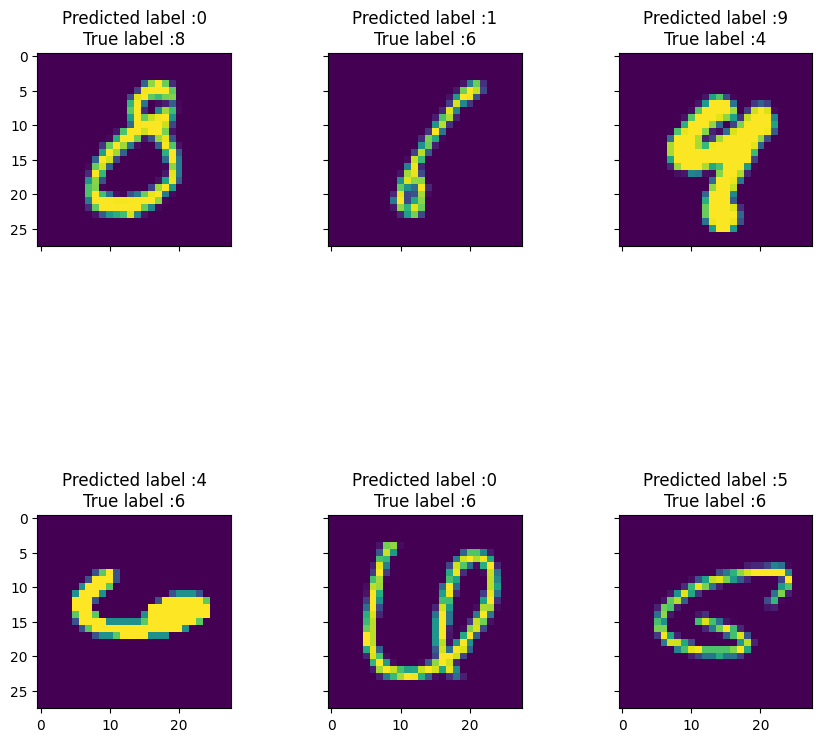

In [46]:
#Display some error results
# Errors are difference between predicted labels and true labels
errors = (pred_cnn_classes - Y_true != 0)

Y_pred_classes_errors = pred_cnn_classes[errors]
Y_pred_errors = pred_cnn[errors]
Y_true_errors = Y_true[errors]
X_test_errors = x_test[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True, figsize=(10, 10))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_test_errors, Y_pred_classes_errors, Y_true_errors)

Now changing the optimizer to see the effect on accuracy of the model

In [47]:
model_cnn.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=0.0001, momentum=0.9, nesterov=True),
              metrics=['accuracy'])
history_cnnSGD = model_cnn.fit(x_train, y_train, epochs=5)
test_loss_cnnSGD, test_acc_cnnSGD = model_cnn.evaluate(x_test, y_test)
print('Test accuracy:', test_acc_cnnSGD)

c:\Users\navob\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\legacy\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0485 - accuracy: 0.9850
Epoch 2/5
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0488 - accuracy: 0.9847
Epoch 3/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0473 - accuracy: 0.9861
Epoch 4/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0453 - accuracy: 0.9857
Epoch 5/5
313/313 [==============================] - 2s 6ms/step - loss: 0.0712 - accuracy: 0.9824
Test accuracy: 0.9824000000953674


313/313 [==============================] - 2s 6ms/step


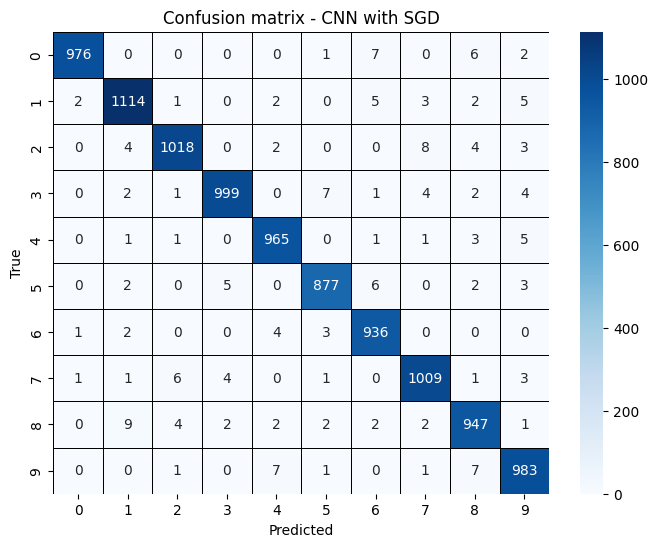

In [48]:
#confusion matrix for CNN with SGD
pred_cnnSGD = model_cnn.predict(x_test)
pred_cnnSGD_classes = np.argmax(pred_cnnSGD, axis=1)
Y_true = np.array(y_test)
# confusion_mtx = confusion_matrix(Y_true, pred_cnnSGD_classes)
plot_confusion_matrix(Y_true, pred_cnnSGD_classes, model_name= 'CNN with SGD')

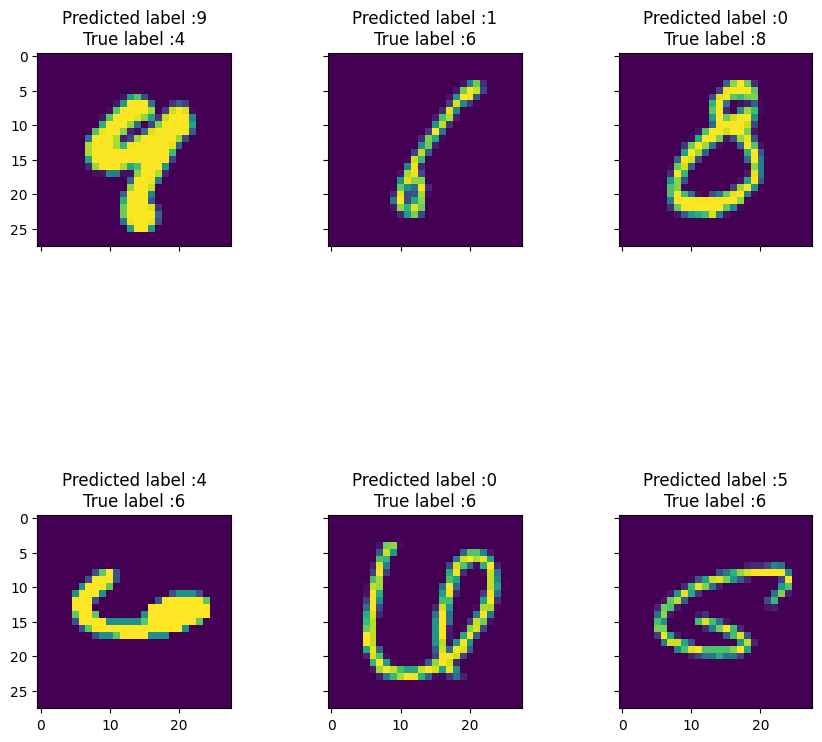

In [49]:
# Display some error results 
# Errors are difference between predicted labels and true labels
errors = (pred_cnnSGD_classes - Y_true != 0)

Y_pred_classes_errors = pred_cnnSGD_classes[errors]
Y_pred_errors = pred_cnnSGD[errors]
Y_true_errors = Y_true[errors]
X_val_errors = x_test[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True, figsize=(10, 10))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

In [50]:
model_cnn.save('model_cnn.h5')

Slight improvement on change of optimizer from Adam to SGD(Stochastic Gradient Descent) whose parameters are tuned.

<h4> Ensemble CNN model

This is done so that we can improve the accuracy of the model by combining the results of multiple models.
Here all models may cpature different patterns


In [51]:
ensemble_models = []
for i in range(3):
    ip = tf.keras.Input(shape=(28, 28, 1))
    # 1st Convolutional Layer
    x = tf.keras.layers.Conv2D(32, 3, activation='relu')(ip)
    x = tf.keras.layers.MaxPooling2D()(x)

    # 2nd Convolutional Layer
    x = tf.keras.layers.Conv2D(64, 3, activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D()(x)
    x = tf.keras.layers.Flatten()(x)
    
    # Passed to the Fully connected layer/ dense layer for training
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    op = tf.keras.layers.Dense(10, activation='softmax')(x)
    model = tf.keras.Model(ip, op)
    ensemble_models.append(model)

In [52]:
model_ensembleCNN = tf.keras.Model(ip, [model(ip) for model in ensemble_models])
model_ensembleCNN.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_ensembleCNN = model_ensembleCNN.fit(x_train, y_train, epochs=5)
test_acc_ensemble = model_ensembleCNN.evaluate(x_test, y_test)
print('Test accuracy:', test_acc_ensemble)

Epoch 1/5
1875/1875 [==============================] - 69s 35ms/step - loss: 0.4152 - model_loss: 0.1367 - model_1_loss: 0.1456 - model_2_loss: 0.1330 - model_accuracy: 0.9584 - model_1_accuracy: 0.9558 - model_2_accuracy: 0.9597
Epoch 2/5
1875/1875 [==============================] - 64s 34ms/step - loss: 0.1359 - model_loss: 0.0436 - model_1_loss: 0.0473 - model_2_loss: 0.0450 - model_accuracy: 0.9866 - model_1_accuracy: 0.9853 - model_2_accuracy: 0.9862
Epoch 3/5
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0951 - model_loss: 0.0312 - model_1_loss: 0.0328 - model_2_loss: 0.0311 - model_accuracy: 0.9901 - model_1_accuracy: 0.9896 - model_2_accuracy: 0.9903
Epoch 4/5
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0707 - model_loss: 0.0227 - model_1_loss: 0.0248 - model_2_loss: 0.0232 - model_accuracy: 0.9929 - model_1_accuracy: 0.9921 - model_2_accuracy: 0.9926
Epoch 5/5
313/313 [==============================] - 4s 11ms/step - loss: 0.0961

In [53]:
model_ensembleCNN.summary()
model_ensembleCNN.save('model_ensembleCNN.h5')

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 model (Functional)             (None, 10)           121930      ['input_3[0][0]']                
                                                                                                  
 model_1 (Functional)           (None, 10)           121930      ['input_3[0][0]']                
                                                                                                  
 model_2 (Functional)           (None, 10)           121930      ['input_3[0][0]']                
                                                                                            

313/313 [==============================] - 3s 9ms/step


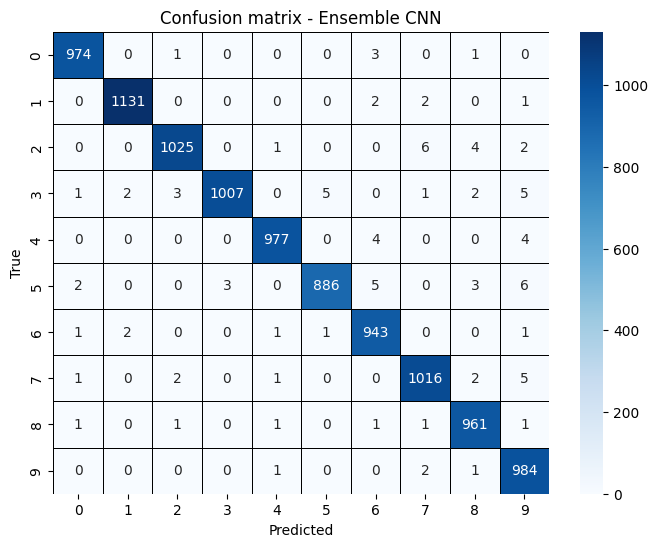

In [54]:
#confusion matrix for ensemble CNN
pred_ensembleCNN = model_ensembleCNN.predict(x_test)
pred_1 = pred_ensembleCNN[0]  # First set of predictions
pred_2 = pred_ensembleCNN[1]  # Second set of predictions
pred_3 = pred_ensembleCNN[2]  # Third set of predictions
# #avg of all the predictions
avg_pred = (pred_1 + pred_2 + pred_3)/3
pred_ensembleCNN_classes = np.argmax(pred_3, axis=1)
Y_true = np.array(y_test)
# confusion_mtx = confusion_matrix(Y_true, pred_ensembleCNN_classes)
plot_confusion_matrix(Y_true, pred_ensembleCNN_classes, model_name= 'Ensemble CNN')


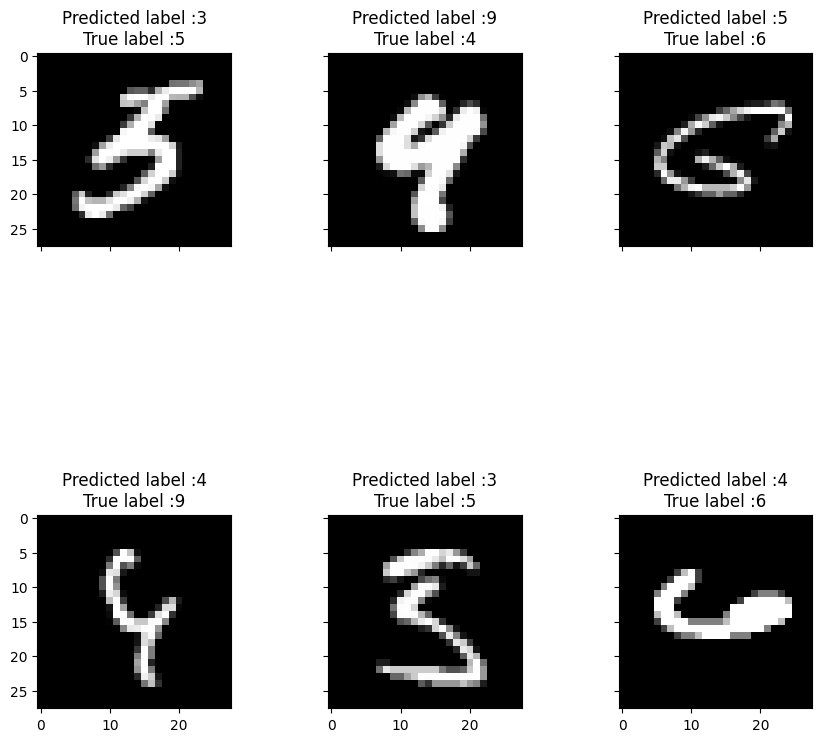

In [55]:
# Display some error results 
# Errors are difference between predicted labels and true labels
errors = (pred_ensembleCNN_classes - Y_true != 0)

Y_pred_classes_errors = pred_ensembleCNN_classes[errors]
Y_pred_errors = avg_pred[errors]
Y_true_errors = Y_true[errors]
X_test_errors = x_test[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True, figsize=(10, 10))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)), cmap='gray')
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1
            
# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_test_errors, Y_pred_classes_errors, Y_true_errors)



SUMMARY OF ALL THE MODELS

<h3><u>Comparing the performance of all the models

In [56]:
table = PrettyTable()
table.field_names = ["Model", "Test Accuracy"]
table.add_row(["Ensemble CNN", test_acc_ensemble[-1]])
table.add_row(["CNN with SGD", test_acc_cnnSGD])
table.add_row(["Simple Model", test_acc_simple])
table.add_row(["SVM (rbf)", metrics.accuracy_score(y_true=y_test_rbf, y_pred=pred_rbf) * 100])
table.add_row(["SVM (linear)", metrics.accuracy_score(y_true=y_test_svm, y_pred=pred_svm) * 100])
print(table)


+--------------+--------------------+
|    Model     |   Test Accuracy    |
+--------------+--------------------+
| Ensemble CNN | 0.9904000163078308 |
| CNN with SGD | 0.9824000000953674 |
| Simple Model | 0.9767000079154968 |
|  SVM (rbf)   | 95.39999999999999  |
| SVM (linear) |       91.79        |
+--------------+--------------------+


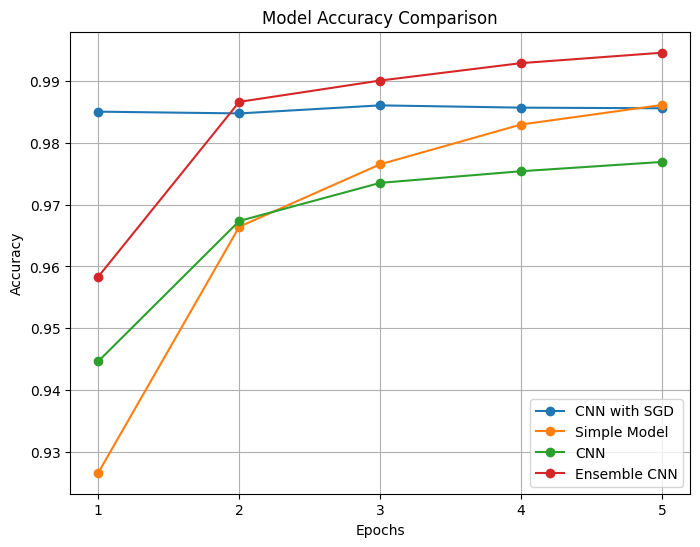

In [57]:
import matplotlib.pyplot as plt

# Assuming you have accuracy history for each model during training
# For example: acc_history_ensemble, acc_history_cnn_sgd, acc_history_simple, etc.
# These variables should contain accuracy history obtained during model training

epochs = range(1, 6)  # Assuming epochs are recorded for each model

# Plotting accuracy for different models
plt.figure(figsize=(8, 6))

plt.plot(epochs, history_cnnSGD.history['accuracy'], label='CNN with SGD', marker='o')
plt.plot(epochs, history_simple.history['accuracy'], label='Simple Model', marker='o')
plt.plot(epochs, history_cnn.history['accuracy'], label='CNN', marker='o')  
plt.plot(epochs, history_ensembleCNN.history['model_accuracy'], label='Ensemble CNN', marker='o')

plt.title('Model Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
# plt.ylim(0, 1)
plt.xticks(epochs)
plt.legend()
plt.grid(True)
plt.show()
